In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.svm import SVC

In [2]:
df_dataset = pd.read_csv('data/cancer.csv')

In [3]:
df_dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
#iniciamos con la preparación de datos eliminando todas las columnas NaN
df_dataset.dropna(how='all', axis=1, inplace=True)

In [5]:
df_dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
#para un análisis correcto y un mejor tratamiento de la información vamos a tratar la columna de diagnóstico con datos binarios
df_dataset['diagnosis'] = (df_dataset['diagnosis'] == 'B').astype(int)

In [7]:
#visualización y verificación de datos binarios en la columna de diagnóstico
df_dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
#separamos las caracteristicas en la variable (X) y las etiquetas en la variable (y) del data set (df_dataset)
#estas variables las utilizaremos para la construcción de nuestro modelo de aprendiazaje automático
X = df_dataset.drop(['diagnosis'], axis=1).values
y = df_dataset['diagnosis'].values

In [9]:
#verificamos la cantidad de valores faltantes en cada columna
na_count = df_dataset.isna().sum()
print(na_count)

print(df_dataset)

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
           id  diagnosis  radius_mean  texture_mean  perime

In [10]:
#dividimos los datos en subconjuntos de entrenamiento y prueba
#con la ayuda de la libreria scikit-learn, para nuestro entrenamiento especificaremos el 20% de los datos se utilizarán como conjunto de prueba, mientras que el 80% se utilizarán como conjunto de entrenamiento.
#además proporcionaremos una semilla para el generador de numeros aleratorios, lo que nos garantizará que la división de los datos sea reproducible
#Estos conjuntos se utilizarán para entrenar y evaluar los modelos de aprendizaje automático.
#La división en conjuntos de entrenamiento y prueba es fundamental para evaluar el rendimiento del modelo en datos no vistos y evitar el sobreajuste.
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#Normalizamos las características para que el modelo tenga un mejor rendimiento y de esta manera poder evitar el sesgo por 
#características que tienen valores mayores.Configurar datos en valores entre 0 y 1
#es importante tener en cuenta que muchos algoritmos de aprendizaje automatico, en especial en especial aquellos que son sensibles a la escala de
#caracteristicas como las SVM, redes neuronales y los algoritmos de gradiente descendente, el uso de 'MinMaxScaler' asegura que
#las caracteristicas estén en el mismo rango, lo que ayuda a mejorar la convergencia del modelo y su rendimiento general
scaler = MinMaxScaler()
X_entrenamiento = scaler.fit_transform(X_entrenamiento)
X_prueba = scaler.transform(X_prueba)

# Analizados, verificados y preparados los datos vamos a aplicar 3 modelos.

# MODELO 1. RANDOM FOREST

In [12]:
#vamos a empezar a trabajar con nuestro conjunto de datos de entrenamiento

from sklearn.ensemble import RandomForestClassifier

# Inicializamos el clasificador de RANDOM FOREST
rf_modelo1 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

In [13]:
#El modelo Randon Forest utiliza el algoritmo de aprendizaje para ajustarse a los datos de entrenamiento
rf_modelo1.fit(X_entrenamiento, y_entrenamiento)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [14]:
#realizamos predicciones en el conjunto de prueba
y_prediccionModel1 = rf_modelo1.predict(X_prueba)

print(y_prediccionModel1)

[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


In [15]:
#posterior se procede a evaluar el modelo para poder calcular la presición del modelo.
from sklearn.metrics import accuracy_score, classification_report

#calculamos la presión del modelo comparando las etiquetas predichas 'y_prediccionModel1' ccon las etiquetas reales del conjunto
# de prueba 'y_prueba'
accuracy_model1 = accuracy_score(y_prueba, y_prediccionModel1)

print(f"Random Forest Accuracy: {accuracy_model1:.2f}")

#el resultado obtenido nos indica que hay una precisión del 96% para el modelo de Random Forest el cual es un resultado bastante bueno.
#este resultado nos indica que el 96% de las muestras en el conjunto de prueba fueron clasificadas correctamente por el modelo. 
#esto nos haria presumir que el modelo tiene un buen desempeño en la tarea de clasificación de cáncer de mama en este 
#conjunto de datos específico.

Random Forest Accuracy: 0.96


In [16]:
#ante esto es importante considerar otras métricas de evaluación como la matriz de confusión, el recall y la presición, para
#obtener una mejor comprensión del rendimiento del modelo esto con el fin de minimizar los falsos positivos y maximizar la deteccion de cáncer de mama.
#MATRIZ DE CONFUSIÓN
matrizConf_modelo1 = confusion_matrix(y_prueba, y_prediccionModel1)

print("Confusion Matrix Modelo 1 RANDOM FOREST:")
print(matrizConf_modelo1)

Confusion Matrix Modelo 1 RANDOM FOREST:
[[40  3]
 [ 1 70]]


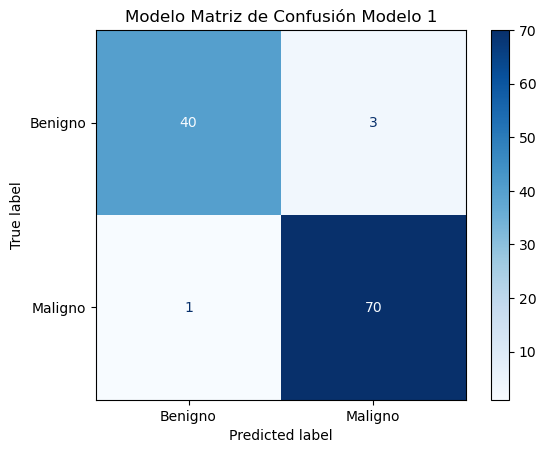

In [17]:
#Diseño de la matriz de confusión

modelo1 = ConfusionMatrixDisplay(matrizConf_modelo1, display_labels=['Benigno', 'Maligno'])
modelo1.plot(cmap=plt.cm.Blues)
plt.title('Modelo Matriz de Confusión Modelo 1')
plt.show()

# Análisis de la Matriz de Confusión:

* Verdaderos positivos (TP): 70 casos fueron correctamente clasificados como positivos (cáncer de mama).
* Verdaderos negativos (TN): 40 casos fueron correctamente clasificados como negativos (no cáncer de mama).
* Falsos positivos (FP): 3 casos fueron incorrectamente clasificados como positivos (falsos alarmas de cáncer de mama).
* Falsos negativos (FN): 1 caso fue incorrectamente clasificado como negativo (cáncer de mama no detectado).

En base a los resultados del modelo de Random Forest podemos decir que logró un buen rendimiento, con un pequeño número de falsos positivos y falsos negativos. Esto indica que el modelo tiene una buena capacidad para distinguir entre los casos de cáncer de mama y los casos sin cáncer de mama en el conjunto de prueba.

In [18]:
# Calculo de la PUNTUACIÓN DE PRECISIÓN

precision_modelo1 = precision_score(y_prueba, y_prediccionModel1)
print('Puntuación de Precisión Modelo 1 RANDOM FOREST:', precision_modelo1)

Puntuación de Precisión Modelo 1 RANDOM FOREST: 0.958904109589041


# Analisis de la Puntuación de Precisión

La precisión del modelo de Random Forest es del 95.89%. Esto significa que el 95.89% de las muestras que el modelo clasificó como positivas (cáncer de mama) fueron verdaderamente positivas, mientras que el resto fueron falsos positivos. 

La precisión es una métrica importante que indica la proporción de predicciones positivas que son correctas en relación con el total de predicciones positivas realizadas por el modelo.

En nuestro contexto el alta precisión significa que el modelo tiene una baja tasa de falsos positivos, lo cual es importante para evitar diagnosticar erróneamente a pacientes sanas como positivas.

In [19]:
#Cálculo de la sensibilidad (Recall) y F1

modelo1_recall = recall_score(y_prueba, y_prediccionModel1)
modelo1_f1 = f1_score(y_prueba, y_prediccionModel1)
print("Modelo 1 RANDOM FOREST")
print("Recall: ", modelo1_recall)
print("f1: ", modelo1_f1)

Modelo 1 RANDOM FOREST
Recall:  0.9859154929577465
f1:  0.9722222222222222


# Análsis de Sensibilidad y Valor F1

El modelo de Random Forest tiene una sensibilidad (recall) del 98.59% y un valor F1 del 97.22%. Esto nos dice que el modelo es muy efectivo en identificar correctamente los casos positivos de cáncer de mama (verdaderos positivos) y minimizar tanto los falsos negativos como los falsos positivos.

* La sensibilidad (recall) del 98.59% indica que el modelo identifica correctamente el 98.59% de todos los casos positivos de cáncer de mama en el conjunto de prueba. En otras palabras, de todas las muestras que realmente son positivas, el 98.59% fueron correctamente identificadas por el modelo como positivas.

* El valor F1 del 97.22% es una medida combinada de precisión y sensibilidad que proporciona una evaluación equilibrada del modelo. Un valor alto de F1 indica un buen equilibrio entre precisión y sensibilidad. En este caso, el valor F1 nos sugiere que el modelo tiene un buen rendimiento en términos de minimizar tanto los falsos positivos como los falsos negativos.

In [20]:
# Análisis en el conjunto de entrenamiento

def evaluar_modelo(modelo, X, y, nombre):
    predicciones = modelo.predict(X)
    matriz_confusion = confusion_matrix(y, predicciones)
    print(f"Matriz de confusión para {nombre}:")
    print(matriz_confusion)
    print(classification_report(y, predicciones))
evaluar_modelo(rf_modelo1, X_entrenamiento, y_entrenamiento, "Random Forest")

Matriz de confusión para Random Forest:
[[169   0]
 [  0 286]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00       286

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



# Evaluando el modelo en el conjunto de entrenamiento

El resultado de la evaluación del modelo Random Forest en el conjunto de entrenamiento muestra un rendimiento perfecto:

La matriz de confusión indica que el modelo clasificó correctamente todas las muestras en el conjunto de entrenamiento, sin ningún error.

El informe de clasificación muestra que todas las métricas (precisión, recall, valor F1) tienen un valor de 1.00 para ambas clases, lo que significa que el modelo predijo correctamente todas las muestras positivas y negativas en el conjunto de entrenamiento.

La precisión general del modelo es del 100%, lo que indica que todas las predicciones realizadas en el conjunto de entrenamiento fueron correctas.

ante estos resultados es importante tener en cuenta que un rendimeinto perfecto en el conjunto de entrenamiento puede indicarnos un sobreajuste, por lo que se deberia evaluar el modelo en un conjunto de datos independientes.

# MODELO 2. REGRESION LOGÍSTICA

In [21]:
#Generamos el modelo
from sklearn.linear_model import LogisticRegression

# con los datos de entrenamiento
modelo2 = LogisticRegression()
modelo2.fit(X_entrenamiento, y_entrenamiento)

LogisticRegression()

In [22]:
#realizamos predicciones en el conjunto de prueba
y_prediccionModelo2 = modelo2.predict(X_prueba)

print(y_prediccionModelo2)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


In [23]:
# Calculo del accuracy

accuracy_modelo2 = accuracy_score(y_prueba, y_prediccionModelo2)

print(f"Regresión Logística Accuracy: {accuracy_modelo2:.2f}")

#La precisión del modelo de regresión logística que se ha calculado es del 98%. Esto significa que el 98% de las muestras 
#en el conjunto de prueba fueron clasificadas correctamente por el modelo.
#a continuación evaluaremos otras métricas de evaluación como la de sensibilidad (recall), de presición, el valor F1 y la matriz
#de confusión para obtener una compresión más completa del rendimiento del modelo.

Regresión Logística Accuracy: 0.98


# Calculo de la Matriz de Confusión

In [24]:
matrizConfusion_Modelo2 = confusion_matrix(y_prueba, y_prediccionModelo2)

print("Confusion Matrix Modelo 2:")
print(matrizConfusion_Modelo2)

Confusion Matrix Modelo 2:
[[41  2]
 [ 0 71]]


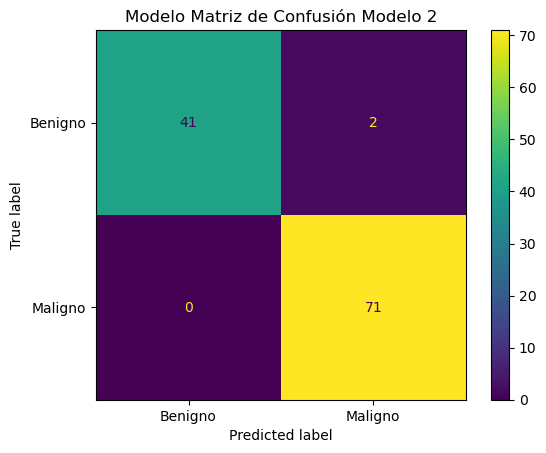

In [25]:
#Diseño de la matriz de confusión

modelo2 = ConfusionMatrixDisplay(matrizConfusion_Modelo2, display_labels=['Benigno', 'Maligno'])
modelo2.plot()
plt.title('Modelo Matriz de Confusión Modelo 2')
plt.show()

# Análisis de la Matriz de Confusión para el Modelo REGRESION LOGÍSTICA

La matriz de confusión indica la cantidad de muestras que fueron clasificadas correctamente e incorrectamente por el modelo 2
en el conjunto de prueba.

* Verdaderos positivos (TP): 71 casos fueron correctamente clasificados como positivos (cáncer de mama).
* Verdaderos negativos (TN): 41 casos fueron correctamente clasificados como negativos (no cáncer de mama).
* Falsos positivos (FP): 2 casos fueron incorrectamente clasificados como positivos (falsos alarmas de cáncer de mama).
* Falsos negativos (FN): 0 casos fueron incorrectamente clasificados como negativos (cáncer de mama no detectado).
    
El modelo de Regresión Logística tiene un buen desempeño en la detección del cáncer de mama en el conjunto de prueba, con una cantidad muy baja de falsos positivos y falsos negativos. Esto sugiere que el modelo tiene una alta precisión y sensibilidad en la clasificación de los casos de cáncer de mama.

In [26]:
# Calculo de la PUNTUACIÓN DE PRECISIÓN

precision_modelo2 = precision_score(y_prueba, y_prediccionModelo2)
print('Puntuación de Precisión Modelo 1 REGRESIÓN LOGÍSTICA:', precision_modelo2)

Puntuación de Precisión Modelo 1 REGRESIÓN LOGÍSTICA: 0.9726027397260274


# Análisis de la Puntuación de Precisión

La puntuación de precisión del Modelo 2 (Regresión Logística) es del 97.26%. Esto significa que el 97.26% de las muestras que el modelo clasificó como positivas (cáncer de mama) fueron verdaderamente positivas, mientras que el resto fueron falsos positivos.

La precisión es una métrica importante que indica la proporción de predicciones positivas que son correctas en relación con el total de predicciones positivas realizadas por el modelo.

En la detección de cáncer de mama, una alta precisión significa que el modelo tiene una baja tasa de falsos positivos, lo cual es importante para evitar diagnosticar erróneamente a pacientes sanas como positivas.

In [27]:
#Cálculo de la sensibilidad (Recall) y F1

modelo2_recall = recall_score(y_prueba, y_prediccionModelo2)
modelo2_f1 = f1_score(y_prueba, y_prediccionModelo2)
print("Modelo 2 REGRESIÓN LOGÍSTICA")
print("Recall: ", modelo2_recall)
print("f1: ", modelo2_f1)

Modelo 2 REGRESIÓN LOGÍSTICA
Recall:  1.0
f1:  0.9861111111111112


# Análsis de Sensibilidad y Valor F1

Para el Modelo 2 (Regresión Logística), ha calculado una sensibilidad (recall) del 100% y un valor F1 del 98.61%. 

Ante los valores obtenidos podemos decir que son resultados muy buenos:

* Un recall del 100% significa que el modelo identificó correctamente todas las muestras positivas de cáncer de mama en el conjunto de prueba. No hubo ningún falso negativo, lo que sugiere que el modelo es muy sensible para detectar los casos positivos.

* Un valor F1 del 98.61% indica un buen equilibrio entre precisión y sensibilidad. Es una medida combinada que tiene en cuenta tanto la precisión como el recall del modelo. Un valor F1 alto nos indica que el modelo tiene un buen rendimiento en términos de minimizar tanto los falsos positivos como los falsos negativos.

El Modelo de Regresión Logística muestra un excelente desempeño en la detección del cáncer de mama en el conjunto de prueba.


# MODELO 3. SVM (Support Vector Machine)

In [28]:
#Previamente ya definidos los datos en características (X) y etiquetas (y), en conjuntos de entrenamiento y prueba
#al definir el parámetro class_weight='balanced', lo que pretendemos indicar es que el modelo debe tener en cuenta el 
#desequilibrio de clases en los datos durante el entrenamiento. Esto es especialmente útil en problemas de clasificación 
#desbalanceada, como la detección de cáncer de mama, donde una clase puede ser significativamente más prevalente que la otra.
svm_modelo3 = SVC(kernel='linear', class_weight='balanced', probability=True)
svm_modelo3.fit(X_entrenamiento, y_entrenamiento)

SVC(class_weight='balanced', kernel='linear', probability=True)

In [29]:
#realizamos predicciones en el conjunto de prueba
y_prediccionModelo3 = svm_modelo3.predict(X_prueba)

print(y_prediccionModelo3)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0]


In [30]:
# Calculo del accuracy

accuracy_modelo3 = accuracy_score(y_prueba, y_prediccionModelo3)

print(f"SVM Accuracy: {accuracy_modelo3:.2f}")

#La precisión del modelo de regresión logística que se ha calculado es del 97%. Esto significa que el 97% de las muestras 
#en el conjunto de prueba fueron clasificadas correctamente por el modelo.
#a continuación evaluaremos otras métricas de evaluación como la de sensibilidad (recall), de presición, el valor F1 y la matriz
#de confusión para obtener una compresión más completa del rendimiento del modelo.

SVM Accuracy: 0.97


In [31]:
matrizConfusion_Modelo3 = confusion_matrix(y_prueba, y_prediccionModelo3)

print("Confusion Matrix Modelo 2:")
print(matrizConfusion_Modelo3)

Confusion Matrix Modelo 2:
[[41  2]
 [ 1 70]]


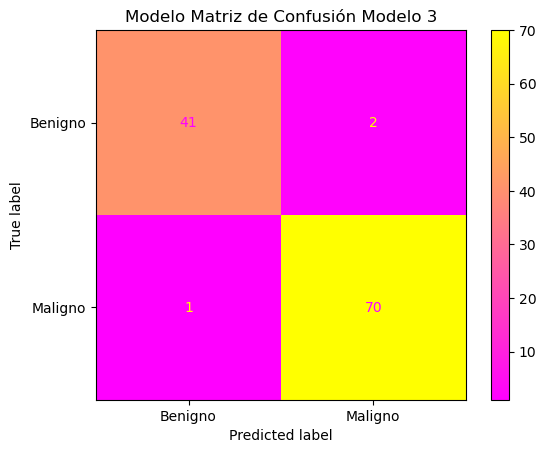

In [32]:
#Diseño de la matriz de confusión

modelo3 = ConfusionMatrixDisplay(matrizConfusion_Modelo3, display_labels=['Benigno', 'Maligno'])
modelo3.plot(cmap=plt.cm.spring)
plt.title('Modelo Matriz de Confusión Modelo 3')
plt.show()

# Análisis de la matriz de Confusión para el Modelo SVM (Support Vector Machine)

Interpretación: 
* Verdaderos positivos (TP): 70 casos fueron correctamente clasificados como positivos (cáncer de mama).
* Verdaderos negativos (TN): 41 casos fueron correctamente clasificados como negativos (no cáncer de mama).
* Falsos positivos (FP): 2 casos fueron incorrectamente clasificados como positivos (falsos alarmas de cáncer de mama).
* Falsos negativos (FN): 1 caso fue incorrectamente clasificado como negativo (cáncer de mama no detectado).

El Modelo SVM (Support Vector Machine) también tiene un buen desempeño en la detección del cáncer de mama en el conjunto de prueba, con una cantidad muy baja de falsos positivos y un solo falso negativo. 

Esto sugiere que el modelo tiene una alta precisión y sensibilidad en la clasificación de los casos de cáncer de mama, aunque hay una pequeña diferencia con respecto al Modelo 2 de REGRESION LOGÍSTICA.

In [33]:
# Calculo de la PUNTUACIÓN DE PRECISIÓN

precision_modelo3 = precision_score(y_prueba, y_prediccionModelo3)
print('Puntuación de Precisión Modelo 1 SVM:', precision_modelo3)

Puntuación de Precisión Modelo 1 SVM: 0.9722222222222222


# Análisis de la Puntuación de Precisión

La puntuación de precisión del Modelo 3 (SVM) es del 97.22%. Esto significa que el 97.22% de las muestras que el modelo clasificó como positivas (cáncer de mama) fueron verdaderamente positivas, mientras que el resto fueron falsos positivos.

La precisión es una métrica importante que indica la proporción de predicciones positivas que son correctas en relación con el total de predicciones positivas realizadas por el modelo.

In [34]:
#Cálculo de la sensibilidad (Recall) y F1

modelo3_recall = recall_score(y_prueba, y_prediccionModelo3)
modelo3_f1 = f1_score(y_prueba, y_prediccionModelo3)
print("Modelo 3 SVM")
print("Recall: ", modelo3_recall)
print("f1: ", modelo3_f1)

Modelo 3 SVM
Recall:  0.9859154929577465
f1:  0.9790209790209791


# Análisis de Sensibilidad y Valor F1

Para el Modelo 3 (SVM), ha calculado una sensibilidad (recall) del 98.59% y un valor F1 del 97.90%. 

* Un recall del 98.59% indica que el modelo identificó correctamente casi todas las muestras positivas de cáncer de mama en el conjunto de prueba. Sin embargo, hubo algunos casos de falsos negativos, lo que sugiere que el modelo podría haber pasado por alto algunos casos positivos.

* Un valor F1 del 97.90% es una medida combinada de precisión y sensibilidad. Es una métrica útil para evaluar el equilibrio entre precisión y recall del modelo. Un valor alto de F1 indica un buen equilibrio entre estas dos métricas.

El Modelo SVM muestra un buen desempeño en la detección del cáncer de mama en el conjunto de prueba, aunque hay margen de mejora para reducir aún más la tasa de falsos negativos.

# CONCLUSIONES.
En base a los resultados obtenidos podemos afirmar que:
* Los tres modelos funcionan bien, pero el principal objetivo es centrarnos en minimizar los falsos positivos, pues es importante que se pasen por alto los casos malignos.
* Dentro de los tres modelos evaluadores el que destaca y minimiza los falsos positivos es el modelo de Regresión Logística el cual logra:

    - Un 100% para casos malignos lo que significa que identifica eficientemente todas las muestras malignas ante estos resultados es importante tener en cuenta que un rendimiento perfecto en el conjunto de entrenamiento puede indicarnos un sobreajuste, por lo que se deberia evaluar el modelo en un conjunto de datos independientes.
    
    - La puntuación F1 es alta 0.9861111111111112 el 98.61% indica un buen equilibrio entre precisión y sensibilidad. Es una medida combinada que tiene en cuenta tanto la precisión como el recall del modelo. Un valor F1 alto nos indica que el modelo tiene un buen rendimiento en términos de minimizar tanto los falsos positivos como los falsos negativos.